In [8]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display
from tensorflow.keras.constraints import max_norm

import pandas as pd

In [9]:
import pandas as pd

#  Load and preprocess data

first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g_onely_main.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_geneb_onely_main.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_genec_only_main_14.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('Adera_Complete_data_base_10_july_v1_2_38pm.txt',delimiter=',',engine='python')
#first_data_adera=pd.read_table('test1_ADMKR3.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('test2_ADMKR3_LIVERc.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('test1_ADMKR3_COMBINED.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('test1_ADMKR3_COMBINEDc.txt',delimiter='\t',engine='python')
#first_data_adera = first_data_adera.dropna(subset=first_data_adera.columns, how='all')
#first_data_adera = first_data_adera.dropna(subset=first_data_adera.columns, how='all')

#first_data_adera.columns = ['index','Gene','CNA','Freq','chromosome','start','strand','Cancer_type']
first_data_adera


,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
0,A2ML1,AMP,6.0,12,8822621.0,8887001.0,77,Testicular_Germ_Cell_Tumors
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
2,A4GNT,AMP,6.0,3,138123713.0,138132390.0,3,Esophageal_Adenocarcinoma
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12979,ZUP1,HOMDEL,8.3,6,116635618.0,116668794.0,3,Diffuse_Large B-Cell_Lymphoma
12980,ZUP1,HOMDEL,6.5,6,116635618.0,116668794.0,3,Prostate_Adenocarcinoma
12981,ZUP1,HOMDEL,6.3,6,116635618.0,116668794.0,3,Uveal Melanoma
12982,ZXDC,AMP,6.1,3,126437601.0,126475891.0,3,Cervical_Squamous_Cell_Carcinoma


In [10]:
first_data_adera1= first_data_adera.dropna(axis = 0, how ='any')
first_data_adera1

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
0,A2ML1,AMP,6.0,12,8822621.0,8887001.0,77,Testicular_Germ_Cell_Tumors
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
2,A4GNT,AMP,6.0,3,138123713.0,138132390.0,3,Esophageal_Adenocarcinoma
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12979,ZUP1,HOMDEL,8.3,6,116635618.0,116668794.0,3,Diffuse_Large B-Cell_Lymphoma
12980,ZUP1,HOMDEL,6.5,6,116635618.0,116668794.0,3,Prostate_Adenocarcinoma
12981,ZUP1,HOMDEL,6.3,6,116635618.0,116668794.0,3,Uveal Melanoma
12982,ZXDC,AMP,6.1,3,126437601.0,126475891.0,3,Cervical_Squamous_Cell_Carcinoma


In [11]:
#first_data_adera2 = first_data_adera1.sort_values(by=['Freq'], ascending=[ False])
#first_data_adera3 = first_data_adera1.sort_values(by=['Gene', 'Is Cancer Gene (source: OncoKB)', 'Freq'], ascending=[True, True, False])
first_data_adera3 = first_data_adera1.sort_values(by=['Gene', 'Cancer_type', 'Freq'], ascending=[True, True, False])
first_data_adera3

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
0,A2ML1,AMP,6.0,12,8822621.0,8887001.0,77,Testicular_Germ_Cell_Tumors
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
2,A4GNT,AMP,6.0,3,138123713.0,138132390.0,3,Esophageal_Adenocarcinoma
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12979,ZUP1,HOMDEL,8.3,6,116635618.0,116668794.0,3,Diffuse_Large B-Cell_Lymphoma
12980,ZUP1,HOMDEL,6.5,6,116635618.0,116668794.0,3,Prostate_Adenocarcinoma
12981,ZUP1,HOMDEL,6.3,6,116635618.0,116668794.0,3,Uveal Melanoma
12982,ZXDC,AMP,6.1,3,126437601.0,126475891.0,3,Cervical_Squamous_Cell_Carcinoma


In [12]:
first_data_adera4 = first_data_adera3.drop_duplicates(subset=['Gene'], keep='first')

In [13]:
first_data_adera4

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
0,A2ML1,AMP,6.0,12,8822621.0,8887001.0,77,Testicular_Germ_Cell_Tumors
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
7,AADACL2,AMP,8.2,3,151733916.0,151761339.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12977,ZSWIM4,AMP,12.1,19,13795443.0,13832254.0,77,Serous_Ovarian_Cancer
12978,ZSWIM7,AMP,9.1,17,15976560.0,15999717.0,3,Sarcoma
12979,ZUP1,HOMDEL,8.3,6,116635618.0,116668794.0,3,Diffuse_Large B-Cell_Lymphoma
12982,ZXDC,AMP,6.1,3,126437601.0,126475891.0,3,Cervical_Squamous_Cell_Carcinoma


In [14]:
import tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Encode and normalize data

encoder = LabelEncoder()
encoder.fit(first_data_adera4["CNA"])
Adera_CNA= encoder.transform(first_data_adera4["CNA"])

Adera_CNA1= to_categorical(Adera_CNA,num_classes=2)


In [15]:
first_data_adera4["CNA"].unique()

array(['AMP', 'HOMDEL'], dtype=object)

In [16]:
#type(first_data_adera["Freq"])
#Adera_CNA1=first_data_adera['CNA']
print(Adera_CNA1.shape) #rember to update because there are genes written in one or more diseases.
Adera_CNA1
type(first_data_adera4 ['CNA'])

#Input_net_Adera = np.concatenate((Adera_freq.T,Adera_CNA1), axis=None)
#Input_net_Adera1=Input_net_Adera.reshape(5,6918).T

Input_net_Adera1=Adera_CNA1
Input_net_Adera1.shape # number of samples,number of 4 states

(7058, 2)


(7058, 2)

In [17]:

Adera_chromosome=first_data_adera4['chromosome']
Adera_chromosome1=np.array(Adera_chromosome)
Adera_chromosome2=Adera_chromosome1.reshape(Input_net_Adera1.shape[0],1)
#print(Adera_chromosome2.shape)

Adera_start=first_data_adera4['start']
Adera_start1=np.array(Adera_start)
Adera_start2=Adera_start1.reshape(Input_net_Adera1.shape[0],1)

Adera_end=first_data_adera4['end']
Adera_end1=np.array(Adera_end)
Adera_end2=Adera_end1.reshape(Input_net_Adera1.shape[0],1)

Adera_strand=first_data_adera4['strand']
Adera_strand1=np.array(Adera_strand)
Adera_strand2=Adera_strand1.reshape(Input_net_Adera1.shape[0],1)

Adera_freq=first_data_adera4['Freq']
Adera_freq1=np.array(Adera_freq)
Adera_freq2=Adera_freq1.reshape(Input_net_Adera1.shape[0],1)

In [18]:
#normalise chromsome numbers
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_chromosome3 = Adera_chromosome2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_chromosome4= scaler.fit_transform(Adera_chromosome3)



#####normalise start values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_start3 = Adera_start2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_start4= scaler.fit_transform(Adera_start3)

####normalise end values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_end3 = Adera_end2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_end4= scaler.fit_transform(Adera_end3)

######normalise stand
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_strand3 = Adera_strand2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_strand4= scaler.fit_transform(Adera_strand3)
Adera_chromosome4.shape


(7058, 1)

In [19]:
#cancer_type_column = 'Cancer_type'

# Get unique cancer types in the dataset
#unique_cancer_types = first_data_adera4[cancer_type_column].unique()

# Count the rows for each cancer type
#for cancer_type in unique_cancer_types:
  #  cancer_type_data =first_data_adera4[first_data_adera4[cancer_type_column] == cancer_type]
   # num_rows = len(cancer_type_data)
   # print("Number of rows in", cancer_type, ":", num_rows)

In [20]:
#k1=first_data_adera4["Is Cancer Gene (source: OncoKB)"].unique()
k1=first_data_adera4["Cancer_type"].unique()

k1.shape[0]

20

In [21]:
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,adera_matrix), axis=1)
print(Adera_CNA1.shape)
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome2,Adera_start2,Adera_end2,Adera_strand2,Adera_freq2), axis=1)
Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome4,Adera_start4,Adera_end4,Adera_strand4), axis=1)
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_start2,Adera_end2), axis=1)
#Input_net_Adera2=adera_matrix
Input_net_Adera2.shape

(7058, 2)


(7058, 6)

In [22]:
#Output_net_Adera=first_data_adera4[["Is Cancer Gene (source: OncoKB)"]]
Output_net_Adera=first_data_adera4[["Cancer_type"]]

Output_net_Adera

first_data_adera4
import tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#encoder.fit(Output_net_Adera)
#Output_net_Adera1 = encoder.transform(Output_net_Adera)

#Output_net_Adera1 = np_utils.to_categorical(Output_net_Adera1,num_classes=3)
#Output_net_Adera1



encoder = LabelEncoder()
#encoder.fit(first_data_adera4[["Is Cancer Gene (source: OncoKB)"]])
encoder.fit(first_data_adera4[["Cancer_type"]])

#Output_net_Adera1 = encoder.transform(first_data_adera4[["Is Cancer Gene (source: OncoKB)"]])
Output_net_Adera1 = encoder.transform(first_data_adera4[["Cancer_type"]])

Output_net_Adera1.shape

Output_net_Adera2=to_categorical(Output_net_Adera1 ,num_classes=k1.shape[0])
Output_net_Adera2.shape

c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


(7058, 20)

In [23]:
Output_net_Adera2

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
Input_Adera_numpy2=Input_net_Adera2.reshape(Input_net_Adera1.shape[0],1,1,6) #7 input values

Output_net_Adera3=Output_net_Adera2.reshape(Input_net_Adera1.shape[0],1,1,k1.shape[0]) #7 cancer types
Output_net_Adera3.shape

(7058, 1, 1, 20)

In [25]:
print(k1.shape[0])

20


In [26]:
Input_Adera_numpy2.shape

(7058, 1, 1, 6)

In [27]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.metrics import SpecificityAtSensitivity, AUC

# %% Build and compile the model

#from tensorflow.keras import regularizers
es_ADERA = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=300)
#es_ADERA = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=300)
#es_ADERA2= ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
#                              patience=0, min_lr=0.5)
grace_model = tf.keras.Sequential([
  #tf.keras.layers.Dense(7, activation='softmax'), #softmax gives probailities that we encode at the end, do change
#tf.keras.layers.Dense(8, activation='elu'),
     #tf.keras.layers.Dense(2, activation='exponential'),
#tf.keras.layers.Conv2D(filters=2, kernel_size=8, strides=1, padding="same"),
#tf.keras.layers.Dense(7, activation='relu'),
 # tf.keras.layers.Dense(256, activation='tanh'),

  #tf.keras.layers.Dense(7, activation='softmax'), #softmax gives probailities that we encode at the end, do change
#tf.keras.layers.Dense(8, activation='elu'),
     #tf.keras.layers.Dense(2, activation='exponential'),
#tf.keras.layers.Conv2D(filters=2, kernel_size=8, strides=1, padding="same"),
#tf.keras.layers.Dense(7, activation='relu'),
  # tf.keras.layers.Dense(7, activation='exponential'),
#tf.keras.layers.Dense(7, activation='relu'),

#Model 1
 #  tf.keras.layers.Dense(256, activation='relu'),
 # tf.keras.layers.BatchNormalization(),
 # tf.keras.layers.Dropout(0.002),
 #  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dense(128, activation='elu'),
 #    tf.keras.layers.Dropout(0.05),
 #tf.keras.layers.Dense(64, activation='selu'),
#  #
 #  tf.keras.layers.Dense(64, activation='elu'),
 #  tf.keras.layers.Dense(32, activation='elu'),
   # tf.keras.layers.Dense(32, activation='relu'),
#tf.keras.layers.Dense(2, activation='exponential'),

 #tf.keras.layers.Dense(20, activation='softmax'),

#Model 2
  tf.keras.layers.Dense(256, activation='relu'),
 tf.keras.layers.Dense(256, activation='relu6'),
 tf.keras.layers.Dense(256, activation='elu'),
   tf.keras.layers.Dense(256, activation='relu'),
 # tf.keras.layers.Conv2D(filters=22, kernel_size=8, strides=1, padding="same"),
tf.keras.layers.Conv2D(filters=22, kernel_size=8, strides=1, padding="same"),
     tf.keras.layers.Dense(256, activation='relu'),
 # tf.keras.layers.Dense(20, activation='sigmoid'),
  tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(20, activation='softmax'),

  ######Model 3
  #   tf.keras.layers.Dense(128, activation='relu'),
  #   tf.keras.layers.Dropout(0.002),
  # tf.keras.layers.Dense(64, activation='relu'),

 #  tf.keras.layers.Dense(32, activation='relu'),
 #   tf.keras.layers.Dense(15, activation='selu'),
#tf.keras.layers.Dense(15, activation='exponential'),
# tf.keras.layers.Dense(15, activation='softmax'),
      ])




#optimizer_Adera=tf.keras.optimizers.Adam(learning_rate=0.5*1e-4, clipnorm = .01)
optimizer_Adera=tf.keras.optimizers.Adamax(learning_rate=2*1e-2, clipnorm = .08)
#optimizer_Adera = tf.keras.optimizers.Adamax(learning_rate=2*1e-2, clipnorm=0.08)
#optimizer_Adera=tf.keras.optimizers.AdamW(learning_rate=1e-5,weight_decay=0.09,jit_compile=True,use_ema=False,ema_momentum=0.91,ema_overwrite_frequency=50000)
#optimizer_Adera=tf.keras.optimizers.AdamW(learning_rate=1e-5,weight_decay=0.09,jit_compile=False,use_ema=True,ema_momentum=0.01,ema_overwrite_frequency=50)
#optimizer_Adera=tf.keras.optimizers.AdamW(learning_rate=1e-5,weight_decay=0.05,jit_compile=False,use_ema=True,ema_momentum=0.01,ema_overwrite_frequency=5)
#optimizer_Adera=tf.keras.optimizers.SGD(learning_rate=1e-15,momentum=0.09,nesterov=True,use_ema=True)
#grace_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-15), loss='categorical_crossentropy', metrics=['accuracy','mse', 'mae'])
#grace_model.compile(optimizer=optimizer_Adera, loss='categorical_crossentropy', metrics=['accuracy','mse', 'mae'])
#grace_model.compile(optimizer=optimizer_Adera, loss='CategoricalFocalCrossentropy', metrics=['accuracy'])
grace_model.compile(optimizer=optimizer_Adera, loss='CategoricalFocalCrossentropy', metrics=[ 'accuracy', SpecificityAtSensitivity(0.5),AUC()  ])
##grace_model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy','mse', 'mae', 'mape'])
#k_adera=grace_model.fit(Input_Adera_numpy2,Output_net_Adera3,verbose=0,validation_split=0.49,epochs=150,batch_size=250, callbacks=[es_ADERA])
 # TEST1_TRAIN_0.8_adera=grace_model.fit(Input_Adera_numpy2,Output_net_Adera3,verbose=1,validation_split=0.49,epochs=350,batch_size=250, callbacks=[es_ADERA]) # TEST1_TRAIN_0.8
k_adera=grace_model.fit(Input_Adera_numpy2,Output_net_Adera3,verbose=0,validation_split=0.40,epochs=150,batch_size=250, callbacks=[es_ADERA])


KeyboardInterrupt: 

In [28]:
#print(k_adera.history.keys())
#print(k_adera.history['val_loss'])
#print(k_adera.history['val_accuracy'])
#print(k_adera.history['mape'])
results = grace_model.evaluate(Input_Adera_numpy2,Output_net_Adera3,batch_size=400)

18/18 [==============================] - 0s 15ms/step - loss: 0.1020 - accuracy: 0.7281 - specificity_at_sensitivity: 0.9978 - auc: 0.9832


In [29]:
# summarize history for accuracy
plt.plot(k_adera.history['accuracy'])
plt.plot(k_adera.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
axes = plt.gca()
#axes.set_ylim([-0.005,0.005])
plt.plot(k_adera.history['loss'])
plt.plot(k_adera.history['val_loss'])
#########################
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.title('model mape')
#plt.plot(k_adera.history['mean_squared_error'])
#plt.plot(k_adera.history['val_mape'])
#plt.plot(k_adera.history['mape'])
#plt.ylabel('mape')
#plt.xlabel('epoch')
#plt.show()
#plt.title('model mae')
#plt.plot(k_adera.history['val_mae'])
#plt.plot(k_adera.history['mae'])
#plt.show()

NameError: name 'k_adera' is not defined

NameError: name 'k_adera' is not defined

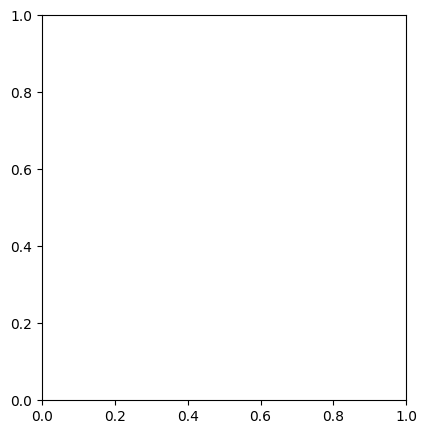

In [30]:
# Plotting multiple metrics
plt.figure(figsize=(16, 5))

# Plot Accuracy
plt.subplot(1, 3, 1)
plt.plot(k_adera.history['accuracy'])
plt.plot(k_adera.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot Loss
plt.subplot(1, 3, 2)
plt.plot(k_adera.history['loss'])
plt.plot(k_adera.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot Specificity at Sensitivity 0.5
plt.subplot(1, 3, 3)
plt.plot(k_adera.history['specificity_at_sensitivity_2'])
plt.plot(k_adera.history['val_specificity_at_sensitivity_2'])
plt.title('Specificity at Sensitivity 0.5')
plt.ylabel('Specificity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Plot AUC
plt.figure(figsize=(8, 5))
plt.plot(k_adera.history['auc_2'])
plt.plot(k_adera.history['val_auc_2'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
Output_net_Adera3a=Output_net_Adera3.reshape(7058, 20)
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D
from tensorflow.keras.metrics import SpecificityAtSensitivity, AUC
import tensorflow as tf

# Define callbacks
es_ADERA = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=300)

# Define the model
grace_model = tf.keras.Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='elu'),
    Dense(256, activation='relu'),
    Conv2D(filters=22, kernel_size=8, strides=1, padding="same"),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax'),  # Output a vector of size 20
    tf.keras.layers.Reshape((1, 20)),  # Reshape to (1, 20)
    tf.keras.layers.Flatten(),
])

# Compile the model
optimizer_Adera = tf.keras.optimizers.Adamax(learning_rate=2 * 1e-2, clipnorm=0.08)
grace_model.compile(optimizer=optimizer_Adera, loss='CategoricalFocalCrossentropy', metrics=['accuracy', SpecificityAtSensitivity(0.5), AUC()])


# Train the model
k_adera = grace_model.fit(Input_Adera_numpy2, Output_net_Adera3a, verbose=1, validation_split=0.40, epochs=150, batch_size=250, callbacks=[es_ADERA])


Epoch 1/150
17/17 [==============================] - 8s 191ms/step - loss: 0.5671 - accuracy: 0.2000 - specificity_at_sensitivity_1: 0.8628 - auc_1: 0.7804 - val_loss: 0.4214 - val_accuracy: 0.2461 - val_specificity_at_sensitivity_1: 0.8878 - val_auc_1: 0.8577
Epoch 2/150
17/17 [==============================] - 2s 141ms/step - loss: 0.3820 - accuracy: 0.3127 - specificity_at_sensitivity_1: 0.9192 - auc_1: 0.8807 - val_loss: 0.3076 - val_accuracy: 0.3991 - val_specificity_at_sensitivity_1: 0.9509 - val_auc_1: 0.9135
Epoch 3/150
17/17 [==============================] - 3s 163ms/step - loss: 0.3145 - accuracy: 0.3850 - specificity_at_sensitivity_1: 0.9499 - auc_1: 0.9129 - val_loss: 0.2695 - val_accuracy: 0.4600 - val_specificity_at_sensitivity_1: 0.9685 - val_auc_1: 0.9296
Epoch 4/150
 8/17 [=============>................] - ETA: 1s - loss: 0.2905 - accuracy: 0.3965 - specificity_at_sensitivity_1: 0.9536 - auc_1: 0.9222

KeyboardInterrupt: 

In [1]:
kr_adera=grace_model.predict(Input_Adera_numpy2[5].reshape(1,1,1,6))
type(kr_adera)

NameError: name 'grace_model' is not defined

In [2]:
import shap
background_data = Input_Adera_numpy2[:100]  # Use a subset of your data as background for SHAP

# Create a SHAP DeepExplainer
adera_explainer=shap.DeepExplainer(grace_model, background_data)
instances_to_explain = Input_Adera_numpy2[:10]  # Example: First 10 instances

# Compute SHAP values
shap_values = adera_explainer.shap_values(instances_to_explain)



NameError: name 'Input_Adera_numpy2' is not defined

In [ ]:
adera_instances=instances_to_explain.reshape(10,6)
adera_shap_values=shap_values.reshape(10,6,20)

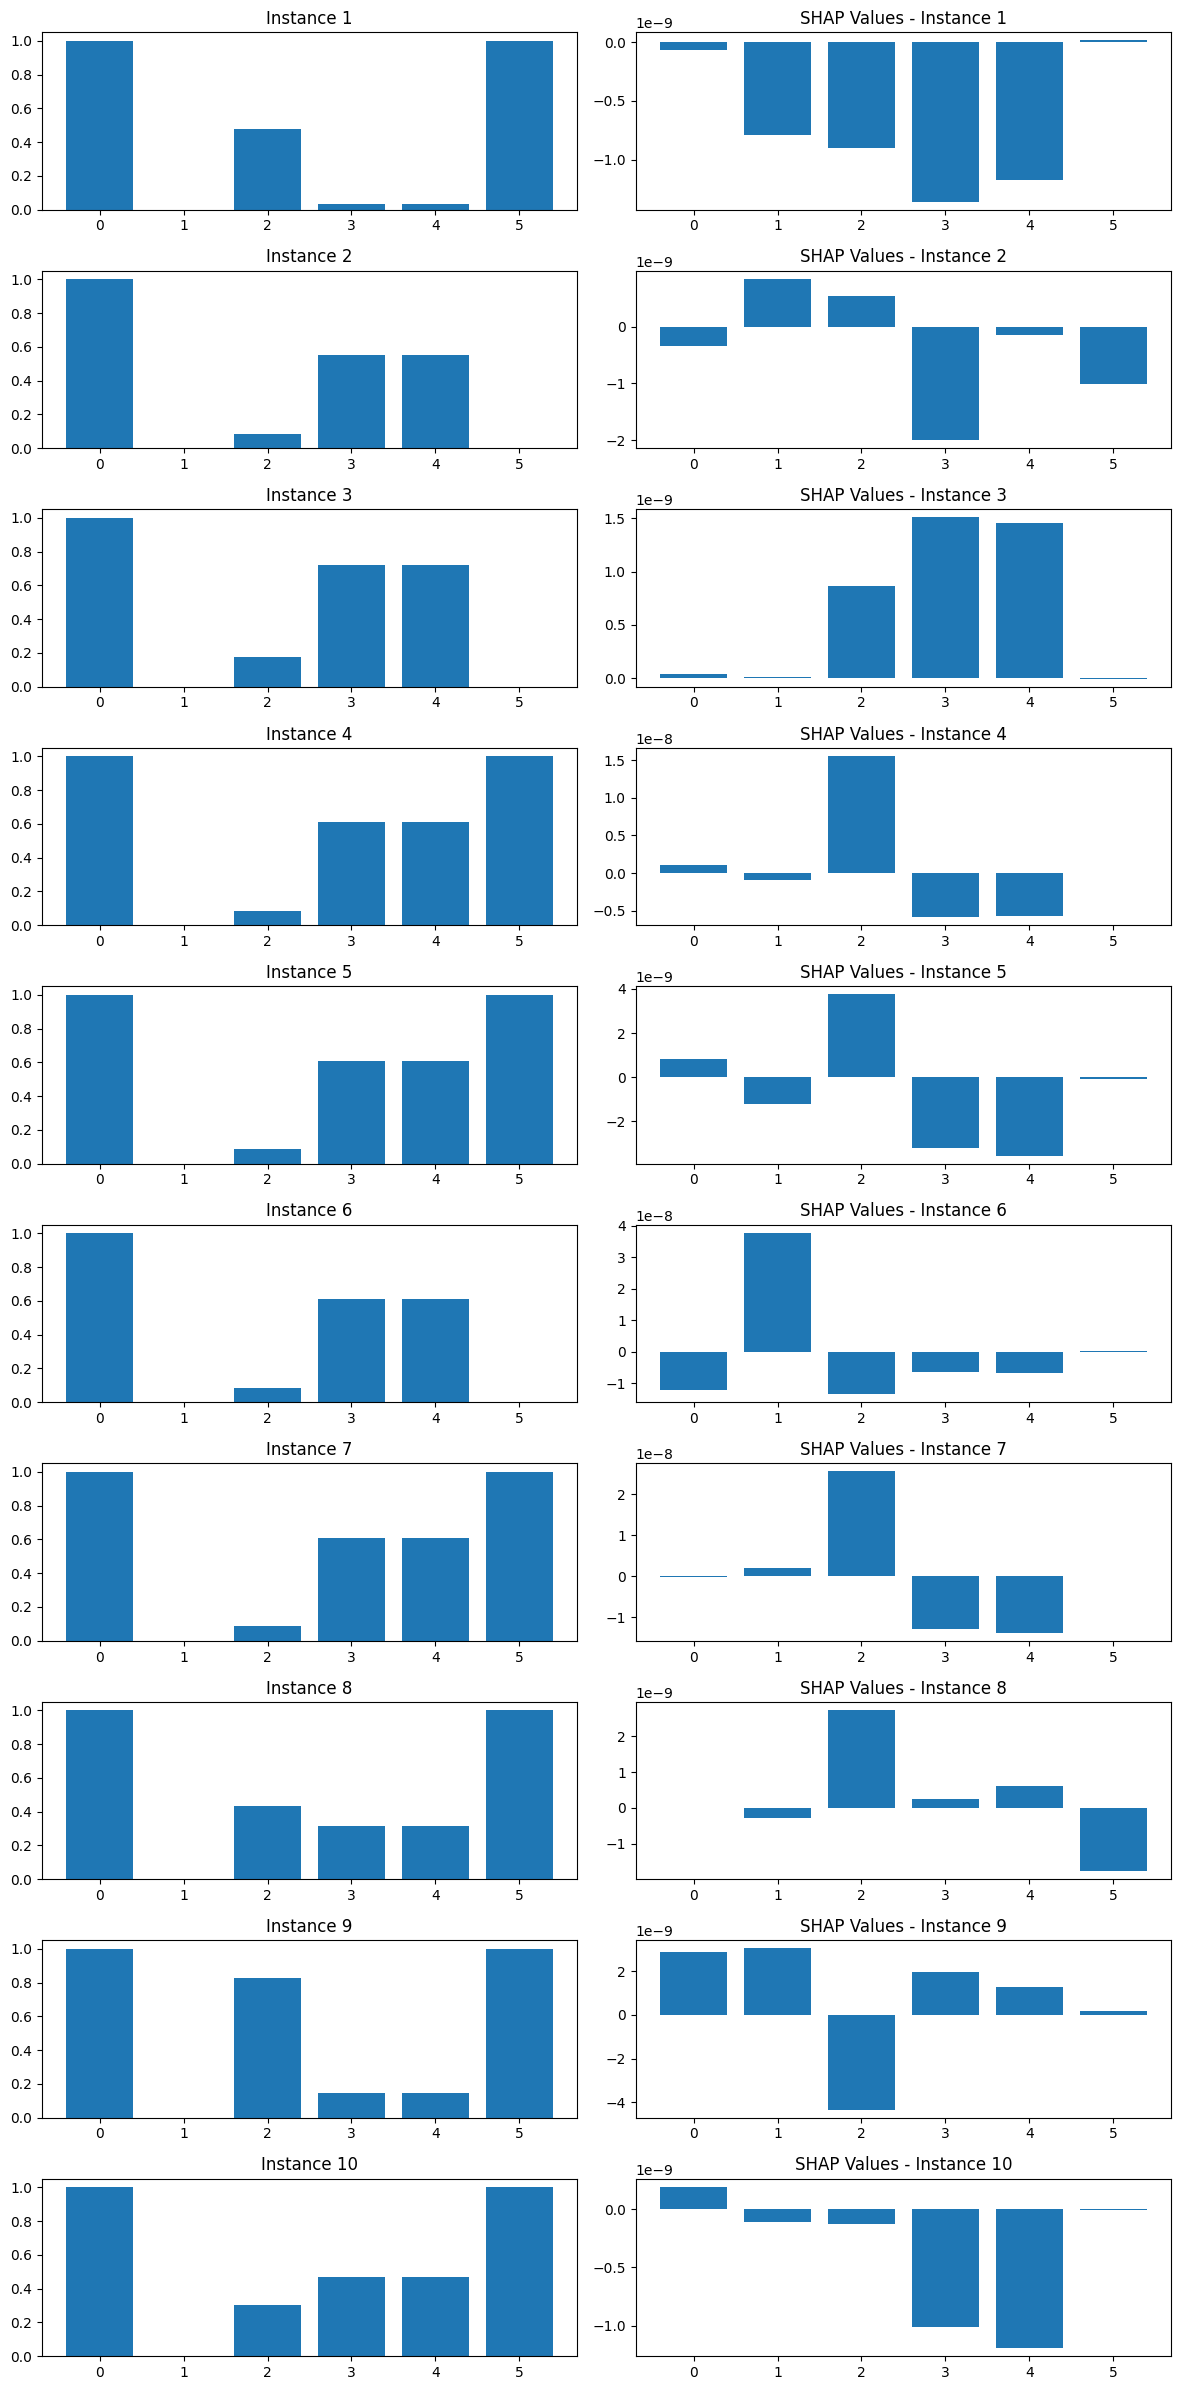

In [ ]:
# Plotting
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(12, 24))

for i in range(10):
    # Plot your instances_to_explain (input data)
    axs[i, 0].bar(np.arange(len(adera_instances[i])), adera_instances[i])
    axs[i, 0].set_title(f'Instance {i+1}')

    # Plot SHAP values for each feature
    axs[i, 1].bar(np.arange(len(adera_shap_values[i])), adera_shap_values[i].mean(axis=1))
    axs[i, 1].set_title(f'SHAP Values - Instance {i+1}')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming adera_shap_values is correctly computed and reshaped to (10, 8, 20)

# Plotting
fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(18, 24))  # Increased ncols for the boxplot

# Plot individual instances and SHAP values
for i in range(10):
    # Plot your instances_to_explain (input data)
    axs[i, 0].bar(np.arange(len(adera_instances[i])), adera_instances[i])
    axs[i, 0].set_title(f'Instance {i+1}')

    # Plot SHAP values for each feature
    axs[i, 1].bar(np.arange(len(adera_shap_values[i])), adera_shap_values[i].mean(axis=1))
    axs[i, 1].set_title(f'SHAP Values - Instance {i+1}')

    # Boxplot of SHAP values across instances for each feature
    axs[i, 2].boxplot(adera_shap_values[:, :, i].flatten())
    axs[i, 2].set_title(f'Boxplot of SHAP Values - Feature {i+1}')

plt.tight_layout()
plt.show()


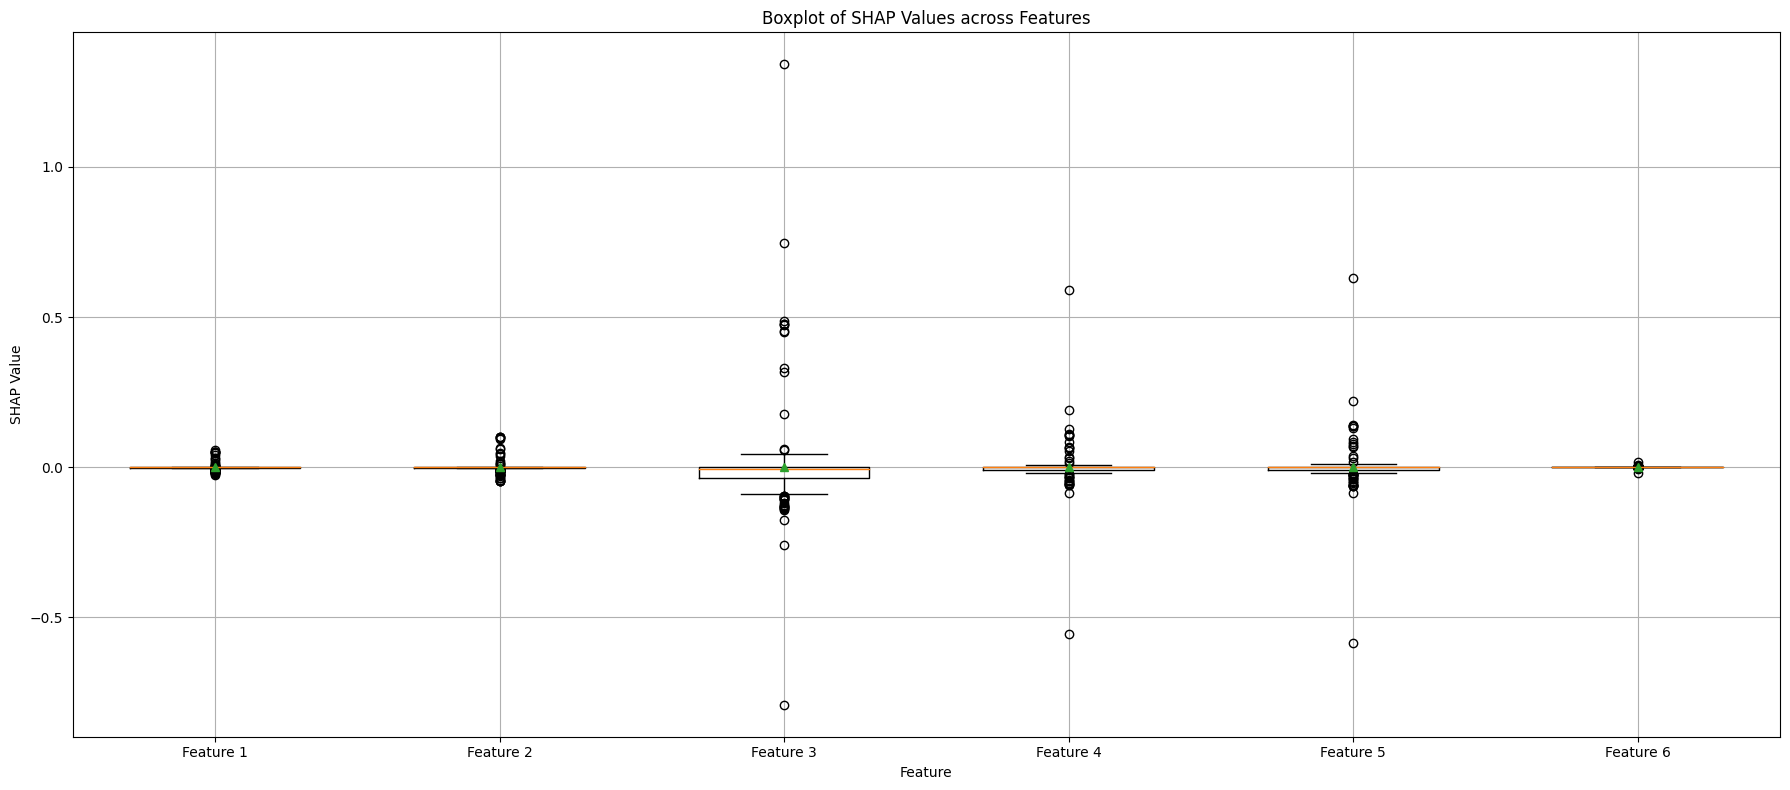

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming adera_shap_values is correctly computed and reshaped to (10, 8, 20)

# Prepare data for boxplot
data_for_boxplot = []
for feature_idx in range(adera_shap_values.shape[1]):
    feature_data = []
    for instance_idx in range(adera_shap_values.shape[0]):
        feature_data.extend(adera_shap_values[instance_idx, feature_idx, :])
    data_for_boxplot.append(feature_data)

# Plotting
fig, axs = plt.subplots(figsize=(18, 8))

# Create boxplot for all features
axs.boxplot(data_for_boxplot, widths=0.6, showmeans=True)
axs.set_xticklabels([f'Feature {i+1}' for i in range(len(data_for_boxplot))])
axs.set_xlabel('Feature')
axs.set_ylabel('SHAP Value')
axs.set_title('Boxplot of SHAP Values across Features')

plt.grid(True)
plt.tight_layout()
plt.show()




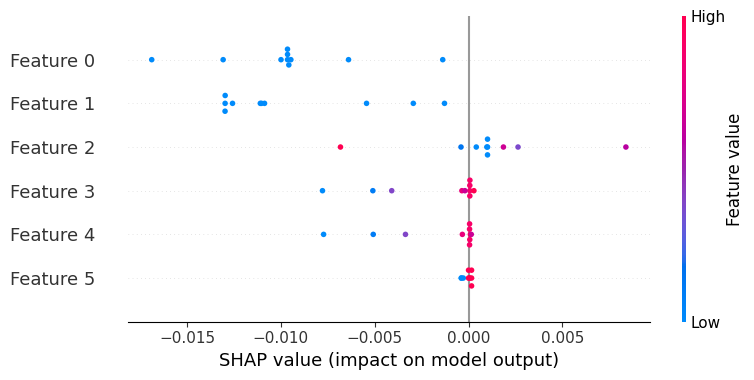

In [ ]:
import shap
selected_shap_values_adera = adera_shap_values[:, :, 19]

# Generate the summary plot
shap.summary_plot(selected_shap_values_adera, adera_instances)


In [ ]:

first_data_adera3["Cancer_type"].unique()
data_adera= {
    "types":first_data_adera3["Cancer_type"].unique(),
    #"values": [0, 1,2,3]
}

data_adera1=pd.DataFrame(data_adera)
data_adera1



import random
#from np_utils import to_categorical

adera_accuracy=[]
num_runs = 1
accuracies = []
y_true_adera=[]
y_pred_adera=[]
 # print(adera_test)
#Input_Adera_numpy2[adera_test].shape
#data_adera


for i in range(0,10):
    adera_test1 = [random.randint(0, Adera_chromosome4.shape[0]-1) for _ in range(1)]
    test_mac = Input_Adera_numpy2[adera_test1].reshape(1, 1, 1, 8)
    #print(test_mac)
    # adera_result = adera_47_40_model.predict(test_mac)
    adera_result = grace_model.predict(test_mac)
    #print("adera_result=",adera_result)
    adera_result1=adera_result.reshape(20,)
    #print(len(adera_result))
    #adera_result_pred_index=np.argmax(adera_result) #how to make  threshold
    import heapq
    kr5=heapq.nlargest(20, range(len(adera_result1)),adera_result.take)
    #print(kr5[1])
    adera_result_pred_index=kr5[0]
    #print("predcited_adera=",data_adera1['types'][adera_result_pred_index]) #is this right?
    #print("real_value=",first_data_adera4['Cancer_type'].iloc[adera_test1])
    y_true_adera.append(first_data_adera3['Cancer_type'].iloc[adera_test1])
    y_pred_adera.append(data_adera1['types'][adera_result_pred_index])
    results_compare_adera= { "true":y_true_adera, "predict_adera": y_pred_adera}
    results_compare_adera1=pd.DataFrame(results_compare_adera)

adera_counter=0
for i in range(0,len(results_compare_adera1)):
    if results_compare_adera1['true'][i].iloc()[0]== results_compare_adera1['predict_adera'][i]:
        adera_counter=adera_counter+1

print(adera_counter)

1/1 [==============================] - 0s 19ms/step
0


In [ ]:
grace_model.save("adera+87+90+20+conv2d")



In [ ]:
#first_data_adera4["Is Cancer Gene (source: OncoKB)"].unique()
#first_data_adera4["Cancer_type"].unique()
#adera_47_40_model = tf.keras.saving.load_model("adera+87+90+20+conv2d")

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
#learning_rate=2*1e-2, clipnorm = .08
# Define the grid of hyperparameters to search

batch_sizes = [400]#+#,100 , 150, 200,250,300,350,400,450,500,600,700,800]
learning_rates = [0.002]#0.00002, 2*1e-4, 2*1e-3, 2*1e-2]

clip_norms = [0.08]#,  0.08,0.12,0.16,0.2]
validation_splits = [0.4]#, 0.4, 0.7, 0.9]

best_validation_loss = float('inf')
best_validation_accuracy = 0.0
best_batch_size = None
best_learning_rate = None
best_clip_norm = None
best_validation_split = None

# Lists to store results
batch_sizes_results = []
learning_rates_results = []
clip_norms_results = []
validation_splits_results = []
validation_accuracy_results = []
validation_loss_results = []

# Perform the grid search
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        for clip_norm in clip_norms:
            for validation_split in validation_splits:
                grace_model = tf.keras.Sequential([
             tf.keras.layers.Dense(256, activation='relu'),


   tf.keras.layers.Dense(256, activation='relu'),
 # tf.keras.layers.Conv2D(filters=22, kernel_size=8, strides=1, padding="same"),
tf.keras.layers.Conv2D(filters=22, kernel_size=8, strides=1, padding="same"),
     tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dense(22, activation='sigmoid'),
  tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(20, activation='softmax'),
                ])

                optimizer_Adera = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=clip_norm)
                grace_model.compile(optimizer=optimizer_Adera, loss='categorical_crossentropy', metrics=['accuracy'])

                #es_ADERA = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
                es_ADERA = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=0, patience=300)

                k_adera = grace_model.fit(
                    Input_Adera_numpy2, Output_net_Adera3,
                    verbose=0, validation_split=validation_split, epochs=100, batch_size=batch_size,
                    callbacks=[es_ADERA]
                )

                # Check if the current hyperparameters yield better validation loss or accuracy
                current_validation_loss = k_adera.history['val_loss'][-1]
                current_validation_accuracy = k_adera.history['val_accuracy'][-1]

                if current_validation_loss < best_validation_loss and current_validation_accuracy > best_validation_accuracy:
                    best_validation_loss = current_validation_loss
                    best_validation_accuracy = current_validation_accuracy
                    best_batch_size = batch_size
                    best_learning_rate = learning_rate
                    best_clip_norm = clip_norm
                    best_validation_split = validation_split

                # Store results
                batch_sizes_results.append(batch_size)
                learning_rates_results.append(learning_rate)
                clip_norms_results.append(clip_norm)
                validation_splits_results.append(validation_split)
                validation_accuracy_results.append(current_validation_accuracy)
                validation_loss_results.append(current_validation_loss)

# Print the best hyperparameters found
print("Best Batch Size:", best_batch_size)
print("Best Learning Rate:", best_learning_rate)
print("Best Clip Norm:", best_clip_norm)
print("Best Validation Split:", best_validation_split)
print("Best Validation Accuracy:", best_validation_accuracy)
print("Best Validation Loss:", best_validation_loss)



NameError: name 'Input_Adera_numpy2' is not defined

In [ ]:
batch_sizes_normalized = np.array(batch_sizes_results) / max(batch_sizes)
learning_rates_normalized = np.array(learning_rates_results) / max(learning_rates)
clip_norms_normalized = np.array(clip_norms_results) / max(clip_norms)
validation_splits_normalized = np.array(validation_splits_results) / max(validation_splits)

# Plotting the results
#plt.figure(figsize=(12, 6))
#plt.errorbar(batch_sizes_normalized, validation_accuracy_results, fmt='o', color='b', label='Validation Accuracy')
#plt.xticks([0.25, 0.5, 0.75, 1.0], ['Batch Size', 'Learning Rate', 'Clip Norm', 'Validation Split'])
#plt.xlabel('Hyperparameters')
#plt.ylabel('Validation Accuracy')
#plt.title('Hyperparameters vs. Validation Accuracy')
#plt.legend()
#plt.grid(True)
#plt.show()

plt.figure()
plt.plot(validation_accuracy_results,batch_sizes_normalized,'o')
plt.show()

In [ ]:
plt.figure()
plt.plot( batch_sizes_normalized, validation_accuracy_results,'o', label='Batch Size')
plt.plot( learning_rates_normalized, validation_accuracy_results,'o', label='Learning Rate')
plt.plot( clip_norms_normalized,validation_accuracy_results, 'o', label='Clip Norm')
plt.plot( validation_splits_normalized,validation_accuracy_results, 'o', label='Validation Split')
plt.ylabel('Validation Accuracy')
plt.xlabel('Hyperparameters')
plt.title('Validation Accuracy vs. Hyperparameters')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0, 1)
plt.grid(True)
plt.show()
